In [1]:
# magic
%matplotlib inline

# imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# from IPython.display import SVG, display # svg images
import graphviz as gv
import random as rand
from math import *

# my libraries
from mcr import *

# make figures large enough
from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
from mcr import *

In [4]:
# Create an empty square
square = MCR()

In [5]:
# Add a couple of shapes to the square
shape1 = Polygon([(0.2,0.2), (0.2, 0.7), (0.7,0.7), (0.7,0.2)])
shape2 = Polygon([(0.5,0.15), (1.0,0.15), (.75, .87)])
shape3 = Polygon([(0.0, 0.2), (0.0, 0.5), (0.3, 0.5), (0.3,0.2)])

square.add_obstacle(shape1)
square.add_obstacle(shape2)
square.add_obstacle(shape3)

# Add a start and goal
square.start = (0.05, 0.05)
square.goal  = (0.95, 0.95)

0, 1: 0.04791666666666663
1: 0.13208333333333336
0: 0.17208333333333334
0, 2: 0.029999999999999992
2: 0.06


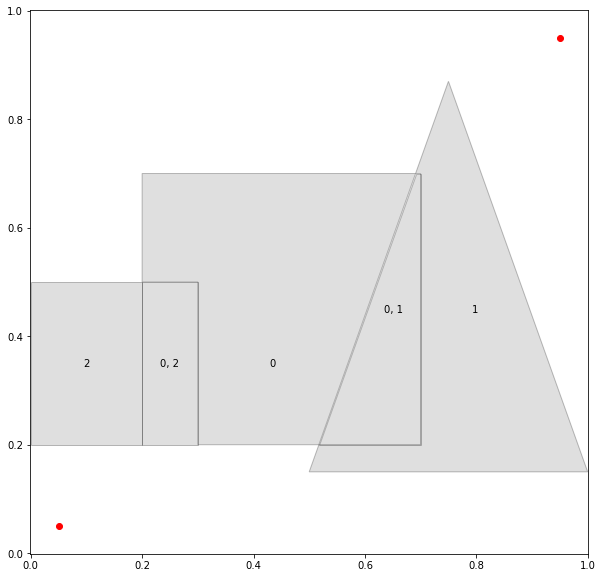

In [6]:
# Display the MCR
square.show_obstacles()

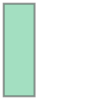

In [7]:
square.overlapped_obstacles[3]

C:\Users\tkrizzle2000\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\tkrizzle2000\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


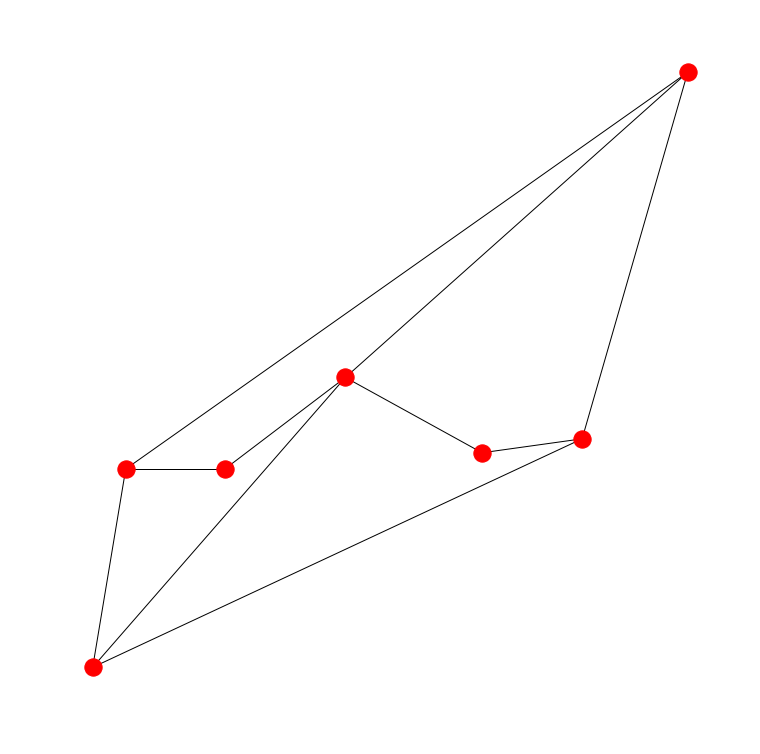

In [8]:
square.create_graph()

In [164]:
import networkx as nx
from itertools import permutations

In [133]:
centroids = {}

#for o in square.obstacles:
#    centroids[o.label]=(o.centroid.x, o.centroid.y)

for o in square.overlapped_obstacles:
    centroids[o.label] = (o.centroid.x, o.centroid.y)

centroids['start'] = square.start
centroids['goal'] = square.goal
centroids

{'0': (0.43224565995575875, 0.48845170836696244),
 '0, 1': (0.638978629898014, 0.37451690821256034),
 '0, 2': (0.24999999999999997, 0.3499999999999999),
 '1': (0.7902758913619193, 0.3956168944970207),
 '2': (0.10000000000000002, 0.35000000000000003),
 'goal': (0.95, 0.95),
 'start': (0.05, 0.05)}

In [184]:
G = nx.Graph()

In [186]:
G.add_nodes_from(centroids.keys())

In [187]:
for n, p in centroids.items():
    G.node[n]['pos'] = p
    G.node[n]['label'] = n

In [188]:
for n in G.nodes():
    print(n)

0, 1
1
0
0, 2
2
start
goal


In [144]:
pos = nx.get_node_attributes(G, 'pos')

In [145]:
pos

{'0': (0.43224565995575875, 0.48845170836696244),
 '0, 1': (0.638978629898014, 0.37451690821256034),
 '0, 2': (0.24999999999999997, 0.3499999999999999),
 '1': (0.7902758913619193, 0.3956168944970207),
 '2': (0.10000000000000002, 0.35000000000000003),
 'goal': (0.95, 0.95),
 'start': (0.05, 0.05)}

In [148]:
labels = nx.get_node_attributes(G, 'label')
labels

{'0': '0',
 '0, 1': '0, 1',
 '0, 2': '0, 2',
 '1': '1',
 '2': '2',
 'goal': 'goal',
 'start': 'start'}

C:\Users\tkrizzle2000\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\tkrizzle2000\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


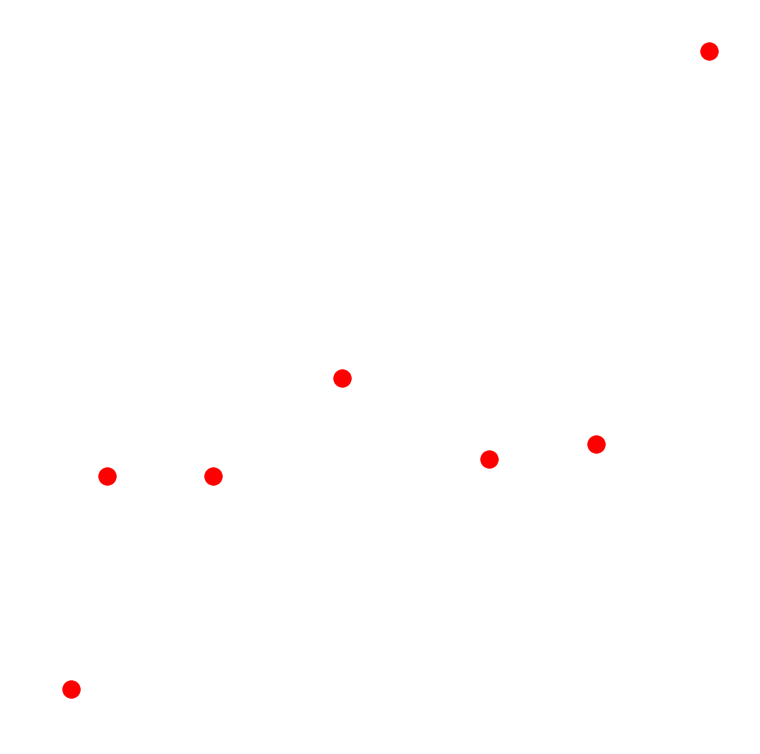

In [202]:
nx.draw(G, pos)
#nx.draw_networkx_labels(G,pos,labels)
plt.show()

In [192]:
G.

{'alpha': 0.25, 'edgecolor': 'black', 'facecolor': 'gray'}

In [203]:
edges = []
edges

[]

In [204]:
current_obstacles = square.overlapped_obstacles
for x, y in combinations(enumerate(current_obstacles),2):
    label = x[1].label + y[1].label
    if x[1].intersects(y[1]) and label.count(",") >= 1: 
        edges.append((x[1].label, y[1].label))

In [205]:
edges

[('0, 1', '1'), ('0, 1', '0'), ('0', '0, 2'), ('0, 2', '2')]

In [206]:
G.add_edges_from(edges)

In [208]:
square.obstacles

In [207]:
G.edges(data=True)

[('0, 1', '1', {}), ('0, 1', '0', {}), ('0', '0, 2', {}), ('0, 2', '2', {})]

In [197]:
for e in G.edges():
    print(e)

In [209]:
end_edges = []
for o in square.obstacles:
    end_edges.append(('start', o.label))
    end_edges.append(('end', o.label))
end_edges

[('start', '0'),
 ('end', '0'),
 ('start', '1'),
 ('end', '1'),
 ('start', '2'),
 ('end', '2')]

In [212]:
square.create_graph()

In [8]:
svg_square = MCR(svg='path/to/missing.svg')

File path/to/missing.svg not found
Couldn't load all shapes


In [9]:
straws = MCR(svg='straws.svg')

0, 10: 0.0050821283559873125
1, 10: 0.005082128355987313
2, 10: 0.005082128355987311
3, 10: 0.005082128355987311
4, 10: 0.005082128355987311
5, 10: 0.005082128355987311
6, 10: 0.005082128355987311
7, 10: 0.005082128355987303
8, 10: 0.005082128355987303
9, 10: 0.005081774027858186
10: 0.0022740779327007285
10: 0.0022744322608298524
10: 0.0022740779327007276
10: 0.0022744322608298567
10: 0.0022740779327007276
10: 0.0022740779327007276
10: 0.0022744322608298606
10: 0.0022740779327007354
10: 0.0022744322608298606
0: 0.002274077932700728
0, 11: 0.0050821283559873125
1: 0.0022740779327007285
1, 11: 0.005082128355987313
2: 0.0022740779327007276
2, 11: 0.005082128355987311
3: 0.0022740779327007276
3, 11: 0.005082128355987311
4: 0.0022740779327007276
4, 11: 0.005082128355987311
5: 0.0022740779327007276
5, 11: 0.005082128355987311
6: 0.0022740779327007276
6, 11: 0.005082128355987311
7: 0.002274077932700724
7, 11: 0.005082128355987303
8: 0.002274077932700724
8, 11: 0.005082128355987303
9, 11: 0.0

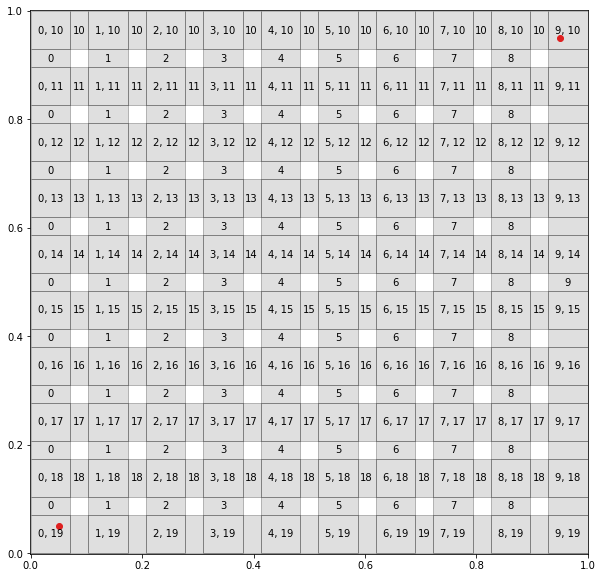

In [10]:
straws.show_obstacles()

In [11]:
nine = list(filter(lambda x:x.label == '9', straws.overlapped_obstacles))[0]

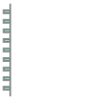

In [12]:
nine

In [13]:
straws2 = MCR(svg='straws2.svg')

In [14]:
nineteen = list(filter(lambda x:x.label == '19', straws2.overlapped_obstacles))[0]

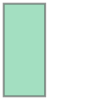

In [15]:
nineteen

0: 0.07128904793856707
1: 0.07128904793856708
2: 0.07128904793856705
3: 0.07128904793856705
4: 0.07128904793856705
5: 0.07128904793856705
6: 0.07128904793856705
7: 0.07128904793856694
8: 0.07128904793856694
9: 0.07128904793856705
10: 0.07128904793856705
11: 0.07128904793856705
12: 0.07128904793856705
13: 0.07128904793856705
14: 0.07128904793856705
15: 0.07128904793856705
16: 0.07128904793856705
17: 0.07128904793856694
18: 0.07128904793856694
19: 0.07128904793856705


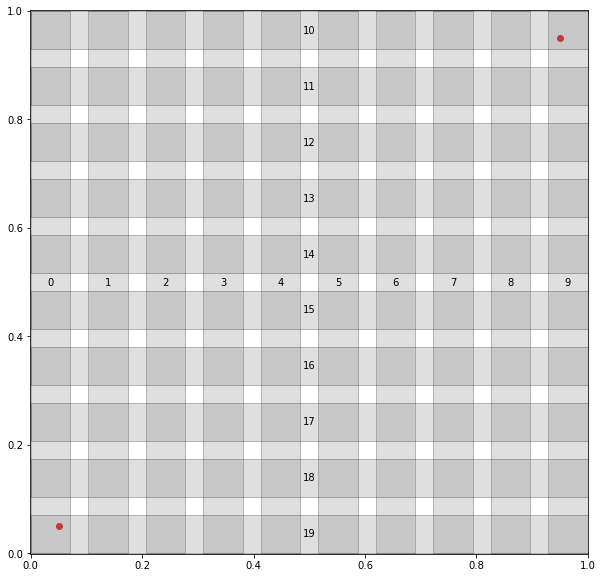

In [16]:
straws.show_bare_obstacles()

In [17]:
straws.obstacles

In [18]:
shapes = MCR(svg='shapes.svg')

0: 0.0031545609509045693
2: 0.044623147230683266
2: 0.0004208729841569938
1, 2: 0.015268563439411477
1, 2, 3: 0.012938228688521207
4: 0.0003476748412007636
0, 2: 0.07974910721190678
0, 2, 5: 0.007601989029332084
0: 0.004718366326603338
0: 0.007827908951806807
0, 5: 0.008431531552829316
0: 0.1389394498951983
0, 5: 0.04464565920335675
0, 4: 0.011939074934100395
0, 4, 5: 0.047585533225923245
4: 0.01493438270749846
4, 5: 0.012527526779871491
5: 0.06632743482450873
1: 0.1122822495391762
1, 6: 0.0029223034608408926
1, 6: 0.002871259823734843
1, 6: 0.0015835290950059343
1, 3: 0.08701507600119211
1, 3, 6: 0.04440926902924555
6: 4.336808689942018e-19


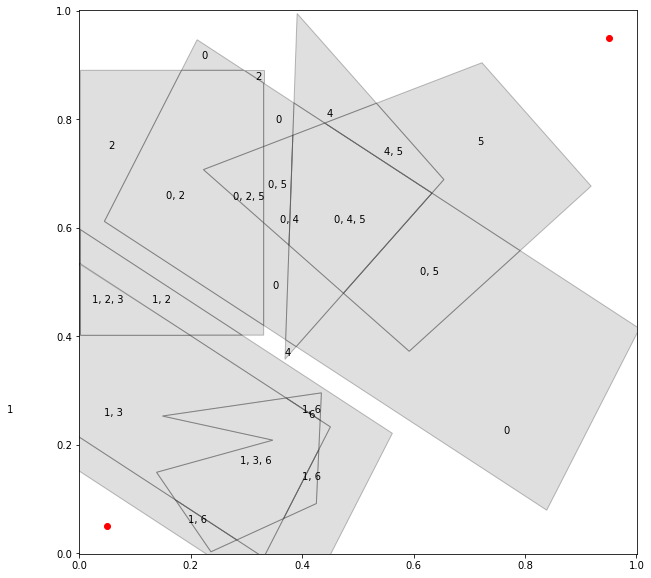

In [19]:
shapes.show_obstacles()

In [20]:
shapes.obstacles

In [21]:
for s in shapes.obstacles:
    print(s.exterior)

LINEARRING (0.2113448481212785 0.9466046287414669, 1.005515418272208 0.4142050839633877, 0.8390083350299757 0.07933384098729857, 0.0448377648790459 0.6117333857653777, 0.2113448481212785 0.9466046287414669)
LINEARRING (-0.06366559104925472 0.6404146283813359, 0.5618611925782399 0.2210589424844612, 0.3953541093360073 -0.1138024774577606, -0.2301726742914872 0.3055532084391142, -0.06366559104925472 0.6404146283813359)
LINEARRING (0.001884843595678431 0.8902827628468879, 0.330793820728756 0.8902827628468879, 0.330793820728756 0.4019959730368554, 0.001884843595678431 0.4019959730368554, 0.001884843595678431 0.8902827628468879)
LINEARRING (0.0008394711793535607 0.5344054408282402, 0.4505638901715245 0.2329172153183041, 0.3308555885663917 -0.007834511109750864, -0.1188688304257792 0.2936537144001851, 0.0008394711793535607 0.5344054408282402)
LINEARRING (0.3908675558102189 0.9949181475969535, 0.6544478539170819 0.6888645714785959, 0.3690900729057502 0.3575286702267356, 0.3908675558102189 0.99

0: 0.01423281921266214
2, 3: 0.013837045573732788
3: 0.03058306218583299
1, 5: 0.00040717954816545863
1, 4: 5.587323366957726e-05
5: 5.963111948670274e-19
0, 1: 0.0031263351099183384
0, 1, 7: 0.00018405651022002453
1: 0.0008742972122435454
1: 0.021734907199455002
1, 7: 0.0018246196396636105
4: 0.0036440128235884985
1, 5: 0.00018163177167201646
1, 4: 0.0036104019606294563
1, 4, 5: 0.0018092551473714966
1, 4, 5, 7: 0.021853315373550838
4, 5: 0.002015033469513144
4, 5, 7: 0.01514797219469462
7: 8.881887703911409e-19
7: 5.3982389571169234e-05
7: 8.317837731278598e-19
1, 5, 7: 0.004082623756695625
1, 5, 7, 9: 7.400764325832375e-05
1, 5, 6, 7: 0.00012826276514262138
1, 5, 6, 7, 9: 0.0006065235781534114
1, 4, 5, 6, 7: 0.0019726127039359216
1, 4, 5, 6, 7, 9: 1.9115303139310586e-06
4, 5, 6, 7: 0.007297113189054506
4, 5, 6, 7, 9: 0.0011322142810326998
5: 0.00020376150781794677
5: 4.065758146820642e-18
5, 6, 9: 0.0009380114759005366
5, 6, 7: 0.0001250433213803412
5, 6, 7: 0.0006745648188168621
5,

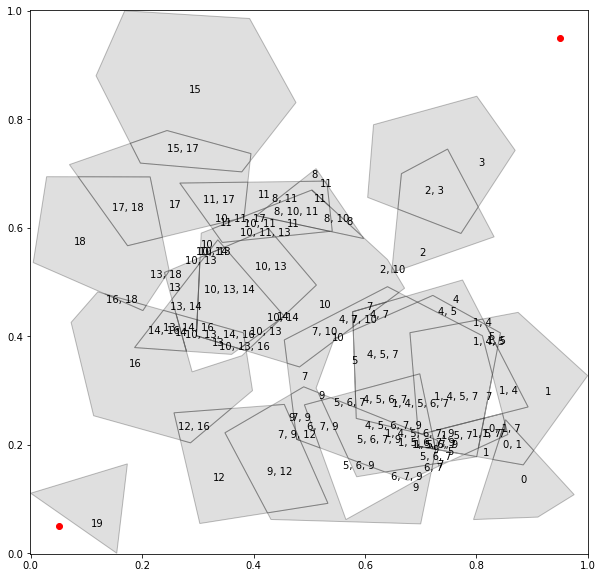

In [22]:
f = random_mcr(20)
f.show_obstacles()

In [23]:
r = f.obstacles[15] - f.obstacles[7]

In [24]:
type(r)

shapely.geometry.polygon.Polygon

In [26]:
print(r)

POLYGON ((0.1173029066521962 0.8801660155006444, 0.1687907094626689 1, 0.3929960491517601 0.9857722665013623, 0.4762635237624896 0.8308039247065071, 0.3789565681034012 0.7030239904332851, 0.1969807819338728 0.7191511743632599, 0.1173029066521962 0.8801660155006444))


In [ ]:
rotations = MCR(svg='rotation.svg')
rotations.show_obstacles()

In [ ]:
MCR